In [7]:
import pandas as pd
from sodapy import Socrata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import csv


In [9]:
token = open('./scripts/secrets','r').readlines()[0].replace('\n','')

In [28]:
client = Socrata("data.cityofchicago.org", token)

query = """SELECT date \
    ,primary_type \
    ,description \
    ,location_description \
    ,arrest \
    ,domestic \
    ,x_coordinate \
    ,y_coordinate \
    ,latitude \
    ,longitude \
    WHERE community_area='14' and Date>='2021-01-01' \
    limit 20000000"""

results = client.get("ijzp-q8t2", query=query)

# Convert to pandas DataFrame
df = pd.DataFrame.from_records(results)

#coord_df = results_df[results_df['latitude','longitude']]
df.dropna(axis=0,how='any',subset=['latitude','longitude'],inplace=True)

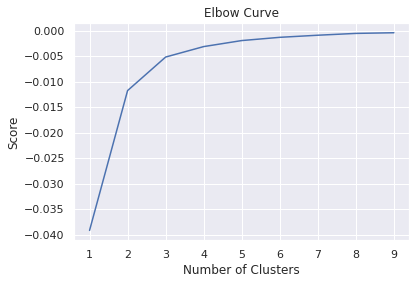

In [12]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = df[['latitude']]
X_axis = df[['longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [40]:
#Convert to numpy array to prep data for model
df.latitude = df.latitude.astype(float)
df.longitude = df.longitude.astype(float)
data = [df[['latitude','longitude']].to_numpy()]

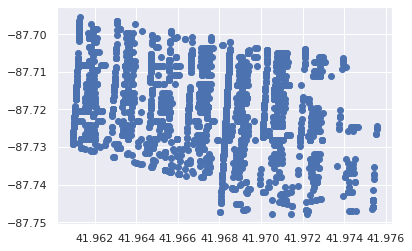

In [41]:
#Look at the data
plt.scatter(data[0][:,0],data[0][:,1])

In [57]:
#Source -https://stackoverflow.com/questions/39401729/plot-latitude-longitude-points-from-dataframe-on-folium-map-ipython
import folium

#create a map
this_map = folium.Map(prefer_canvas=True)

def plotDot(point):
    '''input: series that contains a numeric named latitude and a numeric named longitude
    this function creates a CircleMarker and adds it to your this_map'''
    folium.CircleMarker(location=[point.latitude, point.longitude],
                        radius=2,
                        weight=5).add_to(this_map)

#use df.apply(,axis=1) to "iterate" through every row in your dataframe
df[['latitude','longitude']].apply(plotDot, axis = 1)


#Set the zoom to the maximum possible
this_map.fit_bounds(this_map.get_bounds())

#Save the map to an HTML file
this_map.save('simple_dot_plot.html')

#this_map

In [48]:
kmeans = KMeans(n_clusters = 5)

In [49]:
kmeans.fit(data[0])

KMeans(n_clusters=5)

In [50]:
kmeans.cluster_centers_

array([[ 41.96560848, -87.71786676],
       [ 41.96911559, -87.70995894],
       [ 41.97038   , -87.73950198],
       [ 41.96775353, -87.72729545],
       [ 41.96383424, -87.70468365]])

In [74]:
kmeans.labels_

array([0, 0, 3, ..., 0, 1, 4], dtype=int32)

In [63]:
def color_circle(c):
    colors = ['red','green','blue','yellow','black']
    return colors[c]

In [79]:
#https://gis.stackexchange.com/questions/391129/not-getting-different-colors-on-folium-package
mapPlot = folium.Map(prefer_canvas=True)
for lat, long, c in zip(df.latitude, df.longitude, kmeans.labels_):
    #print(color_circle(c))

    folium.CircleMarker(
        [lat,long],
        radius = 7,
        fill_color = color_circle(c),
        fill=True,
        color=False,
        fill_opacity = 0.7

    ).add_to(mapPlot)
mapPlot.fit_bounds(mapPlot.get_bounds())
mapPlot